In [1]:
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import numpy as np
%config InlineBackend.figure_formats = ['svg']

# MPL
import matplotlib
import matplotlib.patheffects as PathEffects
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as mticker
import matplotlib.cm as cm
from matplotlib.patches import Patch
plt.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['lines.linewidth'] = 2
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['legend.fontsize'] = 12
matplotlib.rcParams['axes.labelsize'] = 12
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['legend.title_fontsize'] = 12
matplotlib.rcParams['axes.spines.top'] = False
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['figure.dpi'] = 250
matplotlib.rcParams['figure.figsize'] = (5,5)

#colors
cmap = plt.get_cmap("viridis")
colors_b = sns.color_palette("colorblind")
colors_s = sns.color_palette("Set2")
viridis = cm.get_cmap('flare', 8)
colors = [viridis(i) for i in range(8)]
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=colors)

/var/folders/cm/wyr4f7dd46340qyn2n3sgyzm0000gn/T/ipykernel_98291/1583647370.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('flare', 8)


### Importing Data

In [2]:
file = 'Adam_160M_SP_SL2048_3Btok_BS256'
res1 = pd.read_pickle('../data/'+file+'.pkl')
res1

,optim,num_steps,bs,lr,wd,beta1,beta2,ppl_train,ppl_all,ppl_test
199,adamw,6200,256,0.001,0.1,0.8000,0.800000,2.340552e+01,"[27183.962421846758, 24152.33599699015, 18783....",24.619017
176,adamw,6200,256,0.001,0.1,0.9500,0.996875,2.181417e+01,"[58346.37816964917, 22801.990617043215, 19098....",23.939279
175,adamw,6200,256,0.001,0.1,0.9750,0.600000,7.057989e+289,"[57648.0918777226, 58330.52194352558, 58243.30...",57971.970823
174,adamw,6200,256,0.001,0.1,0.9750,0.900000,2.234968e+01,"[55879.40237209104, 17418.15489117648, 14699.2...",23.367582
173,adamw,6200,256,0.001,0.1,0.9750,0.800000,9.195277e+02,"[47944.69418056741, 17610.63867587591, 13748.1...",903.958214
...,...,...,...,...,...,...,...,...,...,...
24,adamw,6200,256,0.016,0.1,0.9000,0.996875,2.119102e+03,"[19841.30517966398, 3054.6076455790526, 1931.1...",2075.420195
23,adamw,6200,256,0.016,0.1,0.9500,0.600000,4.369506e+236,"[57508.618010262624, 58330.52194352558, 57599....",57971.970823
22,adamw,6200,256,0.016,0.1,0.9500,0.800000,2.328218e+01,"[25090.18109875154, 8457.795324222967, 3383.10...",23.373959
20,adamw,6200,256,0.016,0.1,0.9500,0.950000,2.077162e+01,"[8277.541388512745, 8435.618799884865, 7761.79...",22.055819


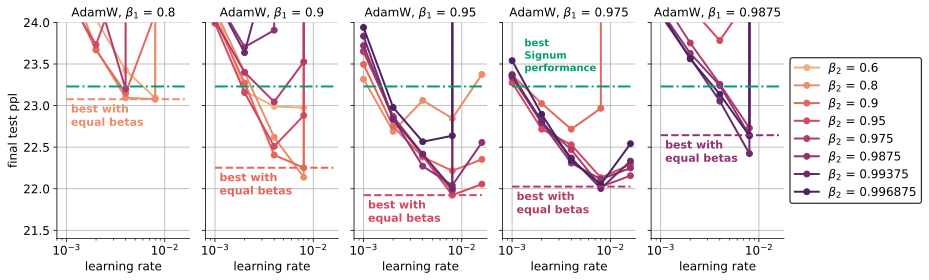

In [3]:

wds = [0.1]
beta1s_n = [0.8, 0.9, 0.95, 0.975, 0.9875]
beta2s_n = [0.6, 0.8, 0.9, 0.95, 0.975, 0.9875, 0.99375, 0.996875]

# Create subplots
fig, axes = plt.subplots(1, 5, figsize=(13, 4), sharey=True)
res_betas = np.zeros((len(beta1s_n), len(beta2s_n) ))
d = []
for i, beta1 in enumerate(beta1s_n):
    ax = axes[i]
    for j, beta2 in enumerate(beta2s_n):
        lrs_plt = np.array(res1[ (res1['beta1'] == beta1) & (res1['beta2'] == beta2)]['lr'])
        data = np.array(res1[(res1['beta1'] == beta1) & (res1['beta2'] == beta2)]['ppl_test'])
        res_betas[i,j] = np.min(data)
        if beta1==beta2:
            res_best_beta12 = np.min(data)
            idx_best = j
        ax.plot(lrs_plt, data, marker='o', label=r'$\beta_2$ = '+str(beta2))
        d.append(data)
    ax.text(lrs_plt[1]/1.8, res_best_beta12 - 0.06, r"best with", color=colors[idx_best], fontsize=11, verticalalignment='top', fontweight='bold')
    ax.text(lrs_plt[1]/1.8, res_best_beta12 - 0.22, r"equal betas", color=colors[idx_best], fontsize=11, verticalalignment='top', fontweight='bold')
     
    ax.plot(lrs_plt, 0*lrs_plt+res_best_beta12,'--',color = colors[idx_best])
    ax.plot(lrs_plt, 0*lrs_plt+23.23,'-.',color = colors_b[2])
    if beta1==0.975:
        ax.text(lrs_plt[1]/1.5, res_best_beta12 + 1.78, r"best", color=colors_b[2], fontsize=10, verticalalignment='top',fontweight='bold')
        ax.text(lrs_plt[1]/1.5, res_best_beta12 + 1.63, r"Signum", color=colors_b[2], fontsize=10, verticalalignment='top',fontweight='bold')
        ax.text(lrs_plt[1]/1.5, res_best_beta12 + 1.48, r"performance", color=colors_b[2], fontsize=10, verticalalignment='top',fontweight='bold')
             

    ax.set_xscale('log')
    ax.set_ylim([21.4, 24])
    ax.set_xlim([0.8e-3, 0.018])
    ax.grid()
    if beta1==beta1s_n[-1]:
        ax.legend(framealpha=1, facecolor='white', edgecolor='black',loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_title(r'AdamW, $\beta_1$ = '+str(beta1))
    #ax.set_xticks(lrs)
    #ax.set_xticklabels([f"{num:.1e}" for num in lrs])
    ax.set_xlabel('learning rate')
    if i == 0:
        ax.set_ylabel('final test ppl')

plt.tight_layout()
#plt.savefig('sm3.pdf', format="pdf", bbox_inches="tight")

#plt.savefig('betas_160M_adam.pdf', format="pdf", bbox_inches="tight")
